## Importação de Bibliotecas

In [1]:
# Bibliotecas gerais e de visualização de dados
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Bibliotecas de machine-learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC 
from sklearn.metrics import recall_score, accuracy_score, make_scorer, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Importação do Arquivo

Tendo em vista que os dados das amostras de água são de difícil obtenção, vamos seguir a seguinte divisão:
- **20% dos dados** irão compor o conjunto de **teste;**
- **80% dos dados** irão compor o conjunto de **treino.**

In [3]:
try:
    df = pd.read_csv('water_potability.csv')
    print('O arquivo foi importado.')
except FileNotFoundError:
    print('O arquivo não foi localizado.')
except TypeError:
    print('O nome do arquivo não foi informado.')
except Exception as e:
    print('A importação do arquivo gerou um erro:', e)

O arquivo foi importado.


In [4]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 24)

In [5]:
df_train.to_csv('water_potability_train.csv', index = False)

In [6]:
df_test.to_csv('water_potability_test.csv', index = False)

In [7]:
df = pd.read_csv('water_potability_train.csv')

## Informações Gerais

Para evitar *data leakage*, vamos observar as principais informações para apenas uma amostra aleatória dos dados.

In [8]:
df_stat = df.sample(150, random_state = 42)

In [9]:
df_stat.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
2241  6.747415  250.419555  24539.713165     2.397985  358.229866   
175   7.392084  173.528778  20185.676229     9.120931  384.117247   
1253  8.842464  229.964422   7839.318760    10.508810  278.428265   
1461  5.873157  153.673381  21910.763570     9.752879  319.356743   
2443  6.715719  195.190599  19966.744697     7.744696  354.208923   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2241    339.344740       15.357290        59.990770   3.377451           1  
175     310.074851       23.317699        81.129543   3.778458           0  
1253    370.085153       15.790977        77.166619   4.576729           1  
1461    352.456041       14.154110        65.234629   5.120888           0  
2443    411.795503       17.323081        67.981741   2.443008           0

In [10]:
df_stat.shape

(150, 10)

In [11]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 2241 to 1660
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               132 non-null    float64
 1   Hardness         150 non-null    float64
 2   Solids           150 non-null    float64
 3   Chloramines      150 non-null    float64
 4   Sulfate          123 non-null    float64
 5   Conductivity     150 non-null    float64
 6   Organic_carbon   150 non-null    float64
 7   Trihalomethanes  139 non-null    float64
 8   Turbidity        150 non-null    float64
 9   Potability       150 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 12.9 KB


## Checagem de Dados Nulos 

In [12]:
df_stat.isnull().sum()

ph                 18
Hardness            0
Solids              0
Chloramines         0
Sulfate            27
Conductivity        0
Organic_carbon      0
Trihalomethanes    11
Turbidity           0
Potability          0
dtype: int64

## Análise Estatística

### Nível de Correlação entre as Colunas:

In [13]:
# Retirando a coluna de classificação das amostras
df_corr = df_stat.drop(columns = 'Potability')

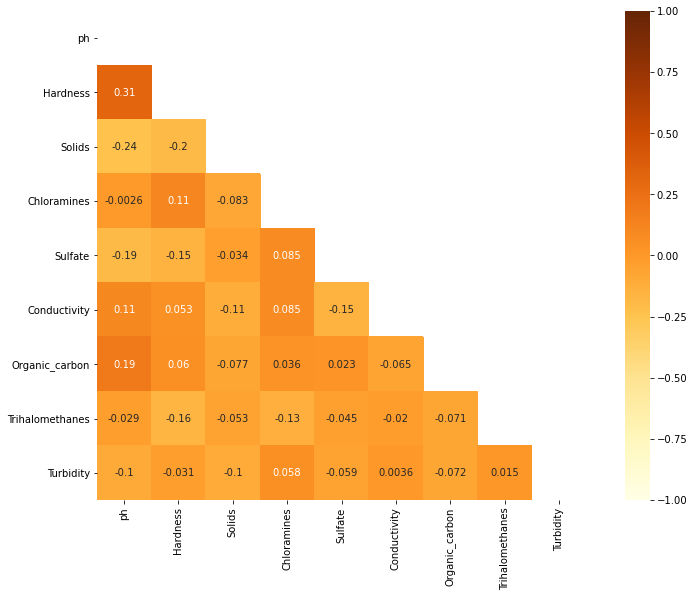

In [14]:
mask = np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize = (14,9))
ax = sns.heatmap(df_corr.corr(), mask = mask, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'YlOrBr', square = True)

De uma forma geral, pode-se afirmar que as colunas numéricas possuem baixa correlação entre si, por mais que, conceitualmente, algumas delas levem em consideração aspectos semelhantes.

### Contagem de Classes

In [15]:
fig = px.bar(df_stat, x = [0,1], y = df_stat['Potability'].value_counts(), color = ['Não-potável','Potável'], 
             text = df_stat['Potability'].value_counts(), width = 500, height = 400, 
             labels=dict(x = '', y = '', color = ''),
             color_discrete_map= {'Não-potável': '#605856', 'Potável': '#023E8A'},
             title = 'Distribuição de Amostras Potáveis e Não-Potáveis')

fig.update_xaxes(type = 'category')

fig.show()

Do total de amostras, cerca de **60% são não-potáveis e 40%, potáveis.**

### Distribuição de Valores

In [16]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
           'Organic_carbon', 'Trihalomethanes', 'Turbidity']

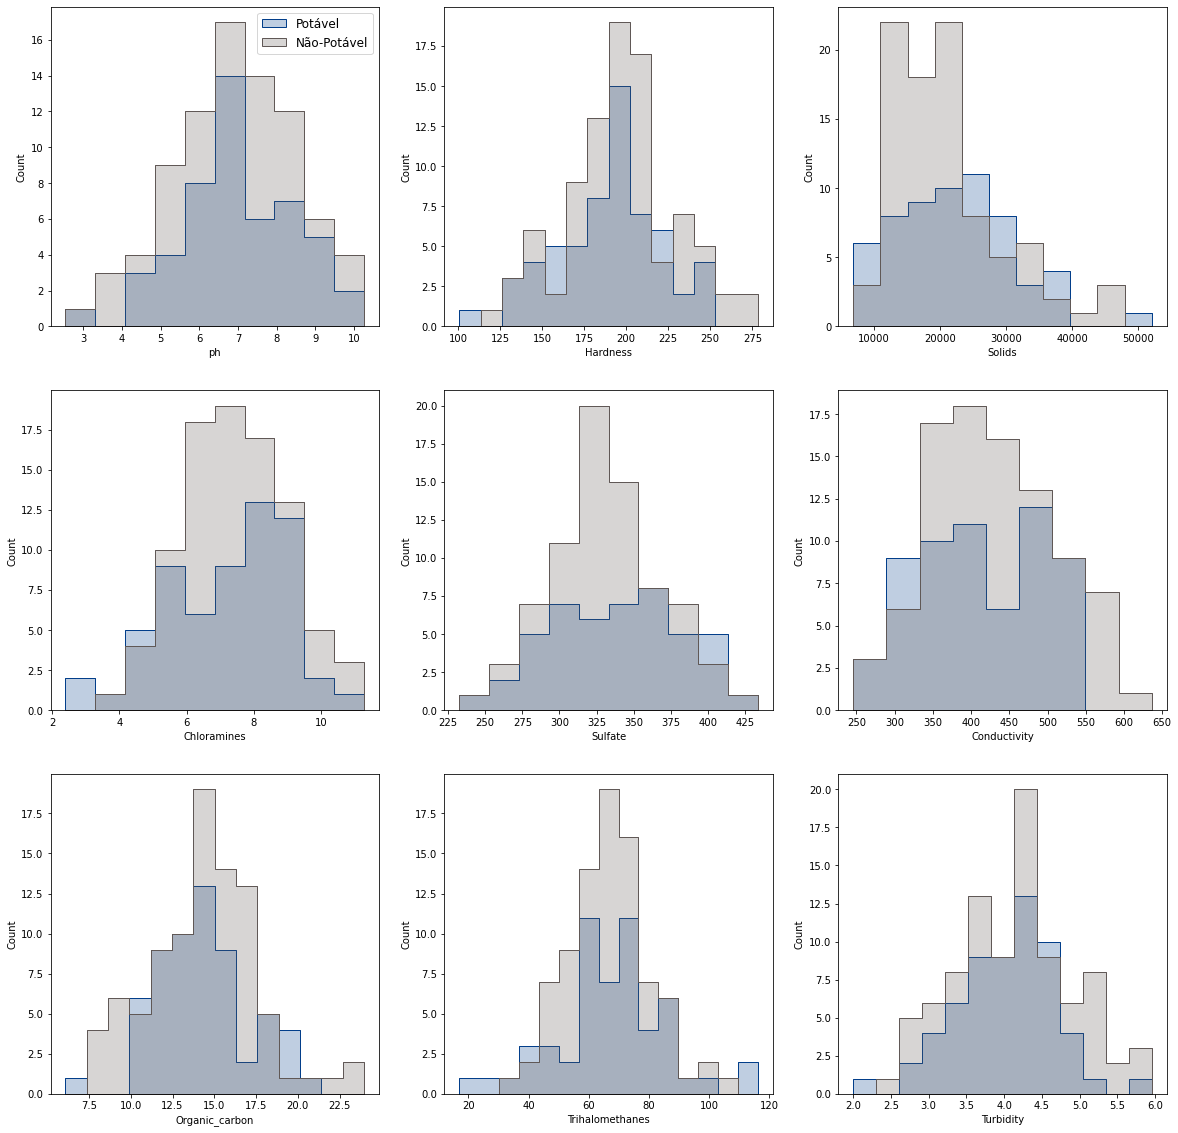

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))
index = 0
axes = ax.flatten()

for col in df[columns]:
    sns.histplot(data = df_stat, x = col, hue = 'Potability', element = 'step', palette = ["#605856", "#023E8A"], legend = False, 
                 ax = axes[index])
    index += 1
    
ax[0,0].legend(loc = 'upper right', labels = ['Potável', 'Não-Potável'], fontsize = 12);

A distribuição de valores para as variáveis numéricas de amostras potáveis e não-potáveis exibiram padrões bastante similares entre si.

Pode-se afirmar que a maior parte das variáveis apresenta um perfil de distribuição normal, com moda, média e mediana bastante próximas entre si. 

A única variável que aparenta um leve enviesamento positivo (à esquerda) é aquela que descreve a quantidade de sólidos nas amostras. Isto não necessariamente se constitui como um ponto muito positivo, uma vez que quanto mais bem distribuídas entre valores as amostras, melhor será o nível de apredizado dos algoritmos futuramente.

## Lidando com os Dados Nulos

Tendo em vista que não houve diferença significativa nas principais estatísticas de posição para água potável e não-potável, optou-se por preencher os dados nulos com a **mediana** para os dados como um todo. 

❗ Apesar de esta não ser uma medida que substitui de forma completamente eficaz os valores faltantes, devido ao número limitado de amostras, deve ser considerada antes da eliminação de tantas instâncias.

A substituição dos dados nulos pela mediana será feita utilizando o Pipeline.

## Aplicação de Modelos de Machine-Learning para Previsão da Potabilidade

### Pontos importantes:

Estaremos utilizando juntamente com as técnicas de machine-learning uma abordagem de validação cruzada, tendo como base a **acurácia** e a **especificidade** dos modelos.

A especificidade se refere à capacidade do modelo em prever bem os chamados "verdadeiros negativos" e corresponde ao *recall* para a classe 0 (água não-potável). Optou-se também pela avaliação desta métrica para os modelos devido ao risco de termos uma previsão afirmando que uma amostra de água é potável, quando na verdade não o é, e sua ingestão pode levar à sérios riscos.

### Separação entre Features e Target

In [18]:
X = df.drop(columns = 'Potability')
y = df['Potability']

### Iniciando a Validação Cruzada

In [19]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

### Modelo 1: Regressão Logística

In [20]:
pipeline_1 = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                       ('model', LogisticRegression())])

In [21]:
val_score_1 = cross_validate(pipeline_1,
                             X, y,
                             scoring = {'specificity':make_scorer(recall_score, labels = [0], average = 'micro'),
                                        'accuracy':make_scorer(accuracy_score)},
                             cv = cv)

In [22]:
print(f"Acurácia: {val_score_1['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_1['test_specificity'].mean():.4f}")

Acurácia: 0.6168
Especificidade: 0.9994


### Modelo 2: Naive-Bayes

In [23]:
pipeline_2 = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                       ('model', GaussianNB())])

In [24]:
val_score_2 = cross_validate(pipeline_2,
                             X, y,
                             scoring = {'specificity':make_scorer(recall_score, labels = [0], average = 'micro'),
                                        'accuracy':make_scorer(accuracy_score)},
                             cv = cv)

In [25]:
print(f"Acurácia: {val_score_2['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_2['test_specificity'].mean():.4f}")

Acurácia: 0.6309
Especificidade: 0.8934


### Modelo 3: Árvore de Decisão

Para o modelo de árvore de decisão, testeremos diferentes níveis de profundidade:

In [26]:
depths = [None, 2, 3, 4, 5, 7, 10, 15]
accuracy_list = []
specificity_list = []

In [27]:
for depth in depths:
    
    pipeline_3 = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                           ('model', DecisionTreeClassifier(max_depth = depth, random_state = 42))])
    
    val_score_3 = cross_validate(pipeline_3,
                                 X, y,
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)
    
    accuracy_list.append(val_score_3['test_accuracy'].mean())
    specificity_list.append(val_score_3['test_specificity'].mean())
    
dict_scores = {'depths': depths, 'accuracy': accuracy_list, 'specificity': specificity_list}
display(pd.DataFrame(dict_scores))

depths  accuracy  specificity
0     NaN  0.588931     0.670384
1     2.0  0.625573     0.923154
2     3.0  0.630153     0.916987
3     4.0  0.636641     0.918239
4     5.0  0.645038     0.918222
5     7.0  0.640076     0.891602
6    10.0  0.643130     0.838936
7    15.0  0.612977     0.752187

Utilizando árvore de decisão, o melhor equilíbrio entre acurácia e especificidade foi alcançado com profundidade máxima de **5** níveis:
- Acurácia: 0.6450
- Especificidade: 0.9182

### Modelo 4: Floresta Aleatória

Para o modelo de árvore aletória, testaremos diferentes números de árvores:

In [28]:
trees = [i for i in range(3, 60, 6)]
accuracy_list = []
specificity_list = []

In [29]:
for tree in trees:
    
    pipeline_4 = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                           ('model', RandomForestClassifier(n_estimators =  tree, random_state = 42))])
    
    val_score_4 = cross_validate(pipeline_4,
                                 X, y,
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)
    
    accuracy_list.append(val_score_4['test_accuracy'].mean())
    specificity_list.append(val_score_4['test_specificity'].mean())
    
dict_scores = {'estimators': trees, 'accuracy': accuracy_list, 'specificity': specificity_list}
display(pd.DataFrame(dict_scores))

estimators  accuracy  specificity
0           3  0.594275     0.695775
1           9  0.616794     0.764571
2          15  0.627099     0.793691
3          21  0.646183     0.817862
4          27  0.651145     0.831490
5          33  0.656870     0.841398
6          39  0.659160     0.846961
7          45  0.660305     0.852537
8          51  0.661069     0.853783
9          57  0.661069     0.856254

Para o uso do algoritmo de Floresta Aleatória, encontramos um paradigma: um número maior de árvores aumenta o custo computacional e eleva as métricas em uma proporção não tão significativa. Assim sendo, adotaremos como principal resultado um algoritmo que utilizou 45 árvores:
- Acurácia: 0.6603
- Especificidade: 0.8525

### Modelo 5: K Vizinhos mais Próximos (kNN)

In [30]:
neighbors = [i for i in range(1, 32, 2)]
accuracy_list = []
specificity_list = []

In [31]:
for neighbor in neighbors:
    
    pipeline_5 = Pipeline([('scaler', MinMaxScaler()),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('model', KNeighborsClassifier(n_neighbors = neighbor))])
    
    val_score_5 = cross_validate(pipeline_5,
                                 X, y,
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)
    
    accuracy_list.append(val_score_5['test_accuracy'].mean())
    specificity_list.append(val_score_5['test_specificity'].mean())
    
dict_scores = {'neighbors': neighbors, 'accuracy': accuracy_list, 'specificity': specificity_list}
display(pd.DataFrame(dict_scores))

neighbors  accuracy  specificity
0           1  0.575573     0.668548
1           3  0.601527     0.732988
2           5  0.620611     0.781295
3           7  0.626718     0.815976
4           9  0.619084     0.819084
5          11  0.632061     0.846345
6          13  0.636641     0.866787
7          15  0.636260     0.879182
8          17  0.640076     0.900260
9          19  0.635496     0.905827
10         21  0.638931     0.915739
11         23  0.640458     0.925031
12         25  0.642366     0.932467
13         27  0.641603     0.940519
14         29  0.640458     0.949195
15         31  0.638931     0.947336

O melhor resultado utilizando o algoritmo kNN foi alcançado para um número de vizinhos igual a 27, o que envolve um maior custo computacional:
- Acurácia: 0.6416
- Especificidade: 0.9405

### Modelo 6: Adaboost

In [32]:
stumps = [i for i in range(3, 60, 6)]
accuracy_list = []
specificity_list = []

In [33]:
for stump in stumps:
    
    pipeline_6 = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                           ('model', AdaBoostClassifier(n_estimators = stump, random_state = 42))])
    
    val_score_6 = cross_validate(pipeline_6,
                                 X, y,
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)
    
    accuracy_list.append(val_score_6['test_accuracy'].mean())
    specificity_list.append(val_score_6['test_specificity'].mean())
    
dict_scores = {'stumps': stumps, 'accuracy': accuracy_list, 'specificity': specificity_list}
display(pd.DataFrame(dict_scores))

stumps  accuracy  specificity
0       3  0.613740     0.900225
1       9  0.609160     0.876101
2      15  0.612595     0.870502
3      21  0.613359     0.864927
4      27  0.610305     0.860593
5      33  0.612214     0.864312
6      39  0.609542     0.858120
7      45  0.613359     0.858737
8      51  0.608779     0.853782
9      57  0.611450     0.851924

O algoritmo com menor número de stumps (3), foi o que retornou o melhor resultado:
- Acurácia: 0.6137
- Especificidade: 0.9002

### Modelo 7: Support Vector Classifier (SVC)

Testaremos diferentes abordagens de SVC: linear, com função de base radial e polinomial de grus 2 e 3. Tendo em vista que o algoritmo SVC tem por base a distância dos pontos em relação às margens de erro, utilizaremos os dados na versão normalizada.

In [34]:
pipeline_7_lin = Pipeline([('scaler', MinMaxScaler()),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('model', LinearSVC())])

In [35]:
val_score_7_lin = cross_validate(pipeline_7_lin,
                                 X, y, 
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)

In [36]:
print('SVC Linear')
print(f"Acurácia: {val_score_7_lin['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_7_lin['test_specificity'].mean():.4f}")

SVC Linear
Acurácia: 0.6191
Especificidade: 1.0000


In [38]:
pipeline_7_rbf = Pipeline([('scaler', MinMaxScaler()),
                           ('imputer', SimpleImputer(strategy = 'median')),
                           ('model', SVC(kernel = 'rbf'))])

In [40]:
val_score_7_rbf = cross_validate(pipeline_7_rbf,
                                 X, y, 
                                 scoring = {'accuracy':make_scorer(accuracy_score),
                                            'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                 cv = cv)

In [41]:
print('SVC Com Função de Base Radial')
print(f"Acurácia: {val_score_7_rbf['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_7_rbf['test_specificity'].mean():.4f}")

SVC Com Função de Base Radial
Acurácia: 0.6725
Especificidade: 0.9492


In [42]:
pipeline_7_poly2 = Pipeline([('scaler', MinMaxScaler()),
                             ('imputer', SimpleImputer(strategy = 'median')),
                             ('model', SVC(kernel = 'poly', degree = 2))])

In [43]:
val_score_7_poly2 = cross_validate(pipeline_7_poly2,
                                   X, y, 
                                   scoring = {'accuracy':make_scorer(accuracy_score),
                                              'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                   cv = cv)

In [44]:
print('SVC Com Função Polinomial de grau 2')
print(f"Acurácia: {val_score_7_poly2['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_7_poly2['test_specificity'].mean():.4f}")

SVC Com Função Polinomial de grau 2
Acurácia: 0.6630
Especificidade: 0.9517


In [45]:
pipeline_7_poly3 = Pipeline([('scaler', MinMaxScaler()),
                             ('imputer', SimpleImputer(strategy = 'median')),
                             ('model', SVC(kernel = 'poly', degree = 3))])

In [46]:
val_score_7_poly3 = cross_validate(pipeline_7_poly3,
                                   X, y, 
                                   scoring = {'accuracy':make_scorer(accuracy_score),
                                              'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                   cv = cv)

In [47]:
print('SVC Com Função Polinomial de grau 3')
print(f"Acurácia: {val_score_7_poly3['test_accuracy'].mean():.4f}")
print(f"Especificidade: {val_score_7_poly3['test_specificity'].mean():.4f}")

SVC Com Função Polinomial de grau 3
Acurácia: 0.6649
Especificidade: 0.9127


### Resultados

<img src = https://user-images.githubusercontent.com/92948655/159072585-0550f487-88a5-4cb2-b016-73f30457b20a.png width="650">

- O modelo que apresentou um melhor equilíbrio entre acurácia e especificidade foi aquele que teve como base o algoritmo **SVC com função de base radial**: 0.6721 e 0.9517, respectivamente; 




- O modelo com melhor especificidade também teve como base um algoritmo SVC, entretanto na versão linear: 1.0. Um modelo que consegue prever de forma completa todos os verdadeiros negativos gera certa desconfiança, principalmente a respeito de seu desempenho em dados ainda não vistos; 




- Com exceção do caso citado, foi possível observar que todos os modelos apresentaram desempenho semelhante para as duas métricas. Os modelos poderiam se tornar ainda mais acurados com uma disponibilidade maior de amostras para treinamento dos dados, mas dada a dificuldade da logística para coleta, talvez isto se torne difícil;




- Outro fator que chama a atenção é que apesar dos modelos terem uma acurácia mediana, conseguem prever muito bem as amostras não-potáveis (verdadeiros negativos) - o que de fato mais interessa em termos de funcionalidade, uma vez que a ingestão de fontes de água classificadas erroneamente como potáveis pode levar ao surgimento de diversos prejuízos por parte de uma população.

A nível de curiosidade, vamos observar se um dos modelos com melhor desempenho (SVM com função de base radial) consegue localizar com qualidade as fontes potáveis de água (verdadeiros positivos), observando a métrica de sensibilidade:

In [48]:
val_score_7_plus = cross_validate(pipeline_7_rbf,
                                  X, y, 
                                  scoring = {'accuracy':make_scorer(accuracy_score),
                                             'specificity':make_scorer(recall_score, labels = [0], average = 'micro'),
                                             'sensitivity': make_scorer(recall_score, labels = [1], average = 'micro')},
                                  cv = cv)

In [49]:
dict_score = {'Acurácia': [val_score_7_plus['test_accuracy'].mean()],
              'Especificidade': [val_score_7_plus['test_specificity'].mean()],
              'Sensibilidade': [val_score_7_plus['test_sensitivity'].mean()]}

display(pd.DataFrame(dict_score))

Acurácia  Especificidade  Sensibilidade
0  0.672519        0.949197       0.228683

💡 Conforme observado, a partir dos dados disponíveis e da forma como se distribuem entre diferentes classes, foi possível a geração de modelos que conseguem identificar muito bem fontes de água **não-potáveis**, mas que acabam desperdiçando muitas fontes de água que poderiam ser usadas para consumo, por classificá-las como não-potáveis.

## Otimização de Hiperparâmetros

Com o intuito de observar melhor o impacto de uma otimização de hiperparâmetros, vamos aplicar uma técnica de Random Search para o algoritmo SVC (máquinas de vetor de suporte para classificação):

In [89]:
# Variações no parâmetro de regularização do modelo
c = [x for x in range(1,6)]

# Variações no coeficiente gamma
gamma = ['scale', 'auto', 0.001, 0.1]

# Criando o grid de escolhas
params_grid = {'model__C': c,
               'model__gamma': gamma}

display(params_grid)

{'model__C': [1, 2, 3, 4, 5], 'model__gamma': ['scale', 'auto', 0.001, 0.1]}

In [90]:
random_search_svc = RandomizedSearchCV(estimator = pipeline_7_rbf,
                                        param_distributions = params_grid,
                                        scoring = {'accuracy':make_scorer(accuracy_score),
                                                   'specificity':make_scorer(recall_score, labels = [0], average = 'micro')},
                                        refit = 'accuracy',
                                        n_iter = 100,
                                        cv = cv,
                                        verbose = 2,
                                        n_jobs = 2)

In [91]:
random_search_svc.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('imputer',
                                              SimpleImputer(strategy='median')),
                                             ('model', SVC())]),
                   n_iter=100, n_jobs=2,
                   param_distributions={'model__C': [1, 2, 3, 4, 5],
                                        'model__gamma': ['scale', 'auto', 0.001,
                                                         0.1]},
                   refit='accuracy',
                   scoring={'accuracy': make_scorer(accuracy_score),
                            'specificity': make_scorer(recall_score, labels=[0], average=micro)},
                   verbose=2)

In [92]:
display(random_search_svc.best_params_)

{'model__gamma': 'scale', 'model__C': 3}

In [93]:
display(random_search_svc.best_score_)

0.6736641221374046

In [94]:
df_opt = pd.DataFrame(random_search_svc.cv_results_)

In [95]:
# Observando os três melhores modelos e suas métricas
df_opt.loc[:, ['param_model__C',
               'param_model__gamma',
               'mean_test_accuracy', 
               'mean_test_specificity']].sort_values('mean_test_accuracy', ascending = False).head(3)

param_model__C param_model__gamma  mean_test_accuracy  mean_test_specificity
8              3              scale            0.673664               0.905209
0              1              scale            0.672519               0.949197
4              2              scale            0.670992               0.915743

Na tentativa de encontrar hiperparâmetros que trouxessem um bom equilíbrio entre acurácia e especificidade, a técnica de Random Search confirmou um modelo SVC com as configurações `C = 3` e `gamma = 'scale'` como sendo aquele que oferece um dos melhores resultados:
- Acurácia: 0.6737
- Especificidade: 0.9052

## Importância das Features

Para avaliarmos as importâncias das features, vamos primeiro definir se visualmente, alguma delas demonstra seu efeito na separação entre as classes, levando em consideração novamente apenas uma amostra dos dados, a fim de evitar enviesamentos:

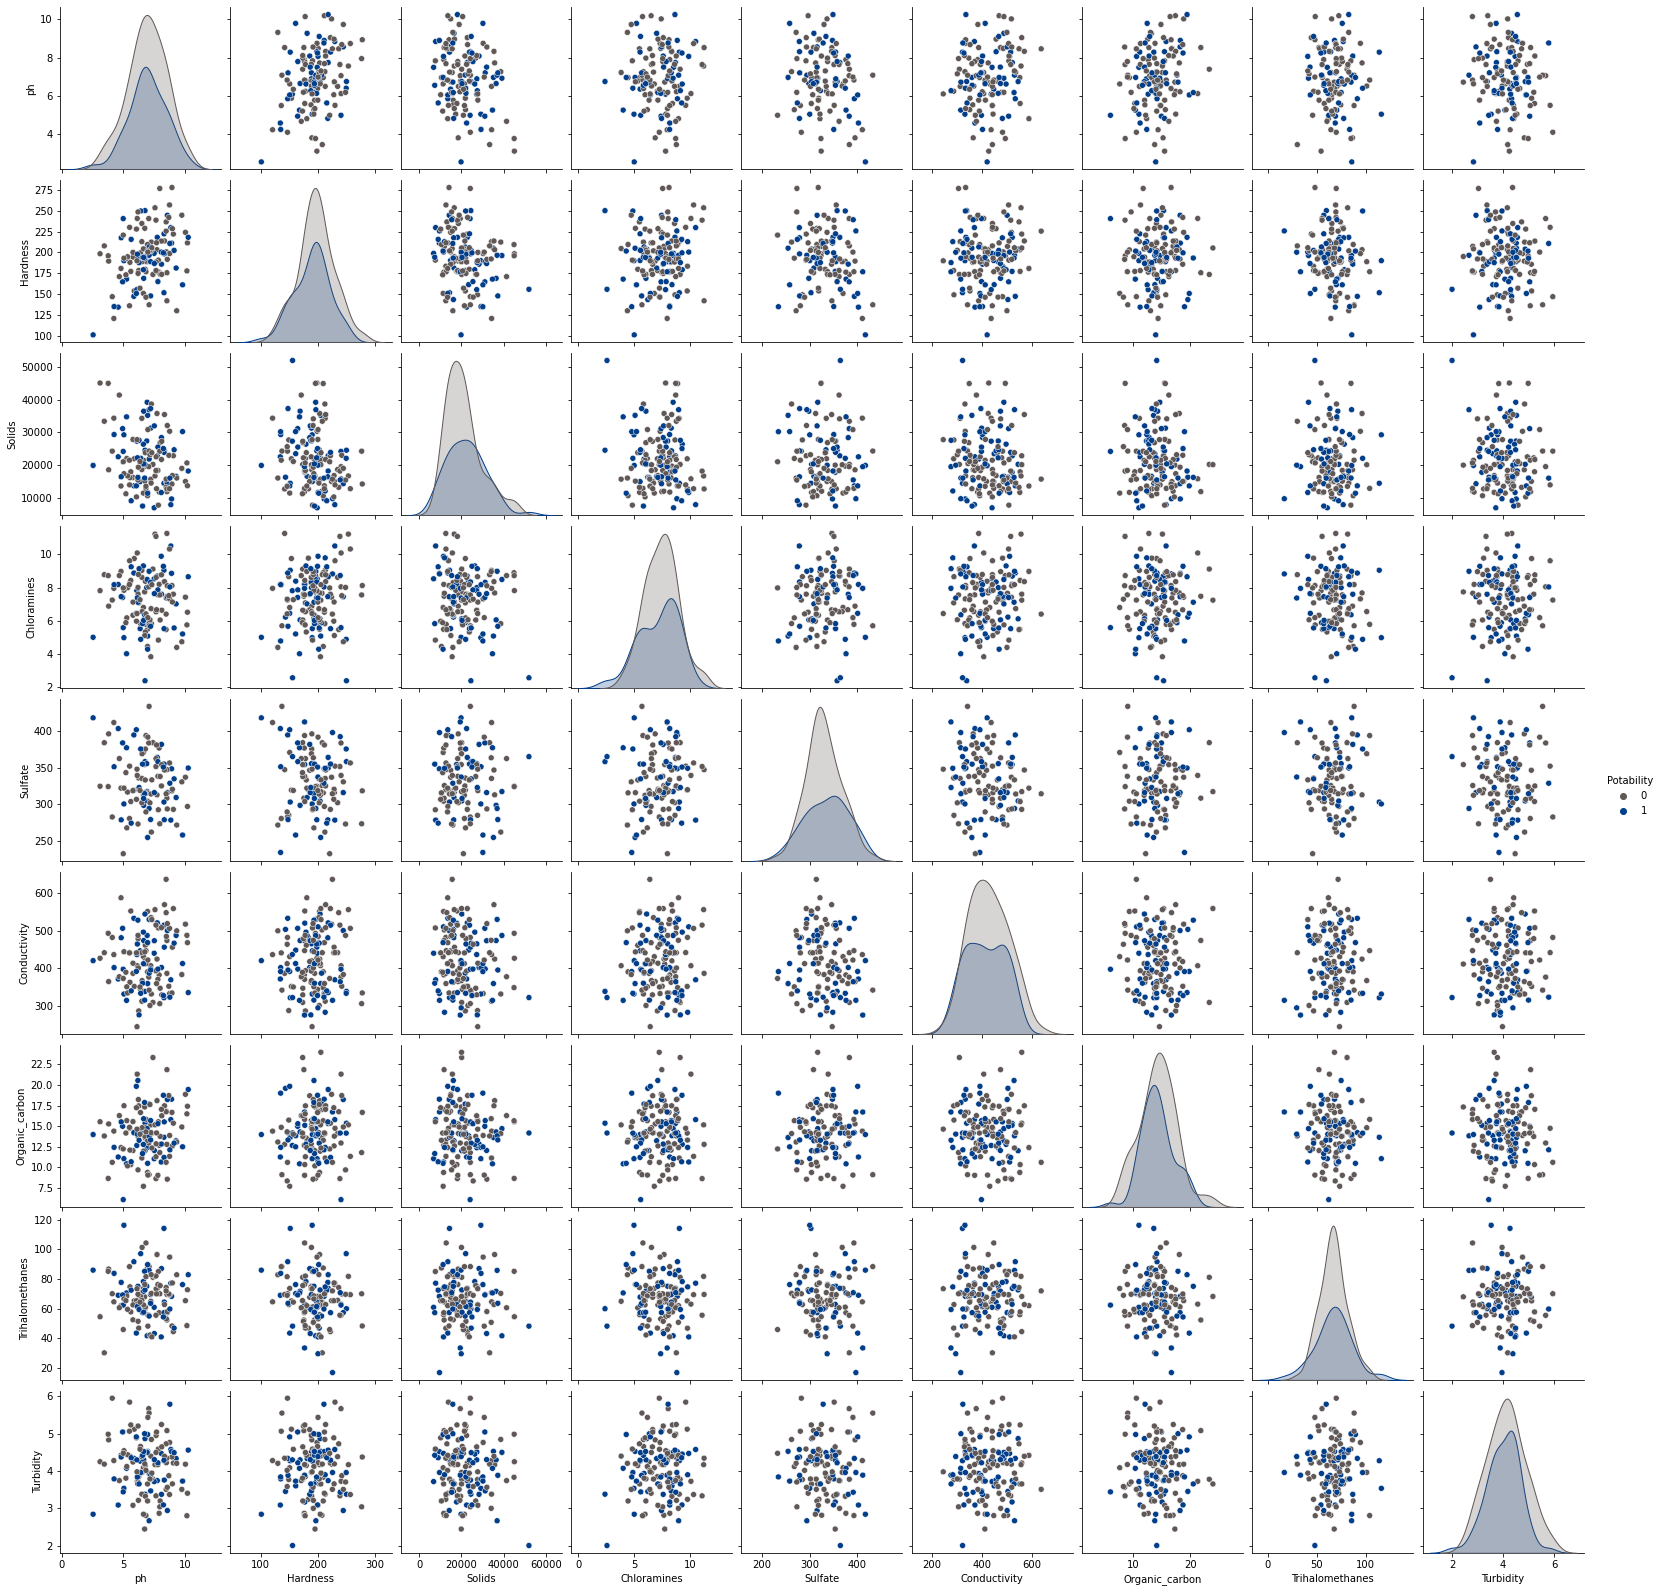

In [96]:
sns.pairplot(df_stat, hue = 'Potability', palette = ["#605856", "#023E8A"])
plt.show()

Observando os gráficos gerados não foi possível notar que a correlação entre pares de features ocasione uma separação nítida entre as amostras potáveis e não-potáveis.

Tendo em vista este fato, vamos utilizar uma técnica de permutação de importância para avaliarmos os efeitos das features para o modelo SVC com função de base radial:

In [97]:
X_stat = df_stat.drop(columns = 'Potability')
y_stat = df_stat['Potability']

In [99]:
feature_names = [f"{feat}" for feat in X_stat.columns]

In [100]:
result = permutation_importance(pipeline_7_rbf,
                                X_stat, y_stat, 
                                scoring = 'accuracy',
                                n_repeats = 10,
                                random_state = 42)

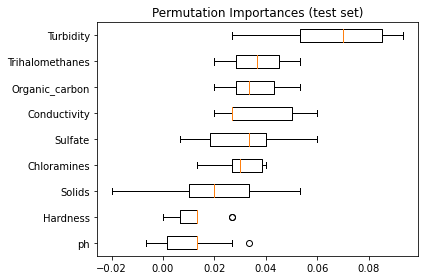

In [101]:
sorted_idx = result['importances_mean'].argsort()

fig, ax = plt.subplots()
ax.boxplot(result['importances'][sorted_idx].T,
           vert=False, labels=feature_names)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Pelo gráfico acima, foi possível concluir que quando seus valores são permutados, as features que descrevem o nível de **turbidez** da água, a **condutividade**, a **quantidade de sulfatos** e o **índice de sólidos**, apresentam grande variação em relação ao resultado obtido originalmente, o que demonstra a forte importância e impacto deste conjunto de variáveis para o modelo.

## Iniciando o Processo de Produção: Pipeline

Para iniciar a produção do modelo, optou-se por utilizar um pipeline contendo:
- Normalização dos dados;
- Imputação da mediana para dados nulos;
- Modelo SVC com função de base radial.

Este modelo gerado pelo pipeline foi ajustado com os dados de treino que já vinham sendo utilizados anteriormente e utilizado para gerar previsões para dados de teste - que foram separados previamente e nunca haviam sido vistos pelo modelo anteriormente.

In [102]:
# Importando os dados de treino
df_train = pd.read_csv('water_potability_train.csv')

In [103]:
# Separando os dados de treino entre features e target
X_train = df_train.drop(columns = 'Potability')
y_train = df_train['Potability']

In [104]:
# Montando o pipeline
pipe_svm = Pipeline([('scaler', MinMaxScaler()),
                     ('imputer', SimpleImputer(strategy = 'median')),
                     ('model', SVC(kernel = 'rbf'))])

In [105]:
# Ajustando o pipeline com os dados de treino
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('model', SVC())])

In [106]:
# Importando os dados de teste
df_test = pd.read_csv('water_potability_test.csv')

In [107]:
# Separando os dados de teste entre features e target
X_test = df_test.drop(columns = 'Potability')
y_test = df_test['Potability']

In [108]:
# Fazendo previsões utilizando os dados de teste
y_pred = pipe_svm.predict(X_test)

In [109]:
# Métricas da comparação entre os dados previstos e os dados reais do conjunto de teste
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.6323    0.9583    0.7619       384
           1     0.7838    0.2132    0.3353       272

    accuracy                         0.6494       656
   macro avg     0.7080    0.5858    0.5486       656
weighted avg     0.6951    0.6494    0.5850       656



Para os dados de teste foi possível observar uma leve queda da acurácia do modelo: de 0.6721 para 0.6494. No que se refere à especificidade, esta teve um discreto aumento, indo de 0.9516 para 0.9583.

As proximidade entre as métricas observadas utilizando apenas os dados de treino no modelo e agora, apresentando dados nunca antes vistos, revela a qualidade e relevância dele.